In [12]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools.dataloader import *
from dlstools import *
from matplotlib.pyplot import *
%matplotlib notebook 
p='/dls/i16/data/2018/cm19668-5/%i.nxs'

#use old data loader as nexus loader failed with multidimensional scans - OK now
datadir='/dls/i16/data/2018/cm19668-5/'
d=dataloader.dlsloader(datadir+'%i.dat')


In [4]:
def pppscan(scan_no):
    
    n=pdnx(p % scan_no)
    c1n=n.C1/n.ic1monitor;
    c2n=n.C2/n.ic1monitor;
    c3n=n.C3/n.ic1monitor;
    c4n=n.C4/n.ic1monitor;

    plt.figure();
    plt.plot(n.ppp_offset, n.ic1monitor/max(n.ic1monitor)*2);
    plt.plot(n.ppp_offset, 2*(c1n-min(c1n))/(abs(max(c1n)-min(c1n)))-1,'c'); 
    plt.plot(n.ppp_offset, 2*(c2n-min(c2n))/(abs(max(c2n)-min(c2n)))-1,'r'); 
    plt.plot(n.ppp_offset, 2*(c3n-min(c3n))/(abs(max(c3n)-min(c3n)))-1,'k'); 
    plt.plot(n.ppp_offset, 2*(c4n-min(c4n))/(abs(max(c4n)-min(c4n)))-1,'b'); 
    title(n.scan)
    plt.grid(1); plt.axis('tight')

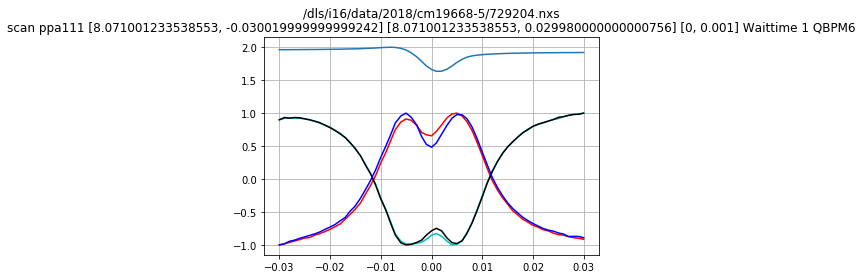

In [5]:
pppscan(729204)


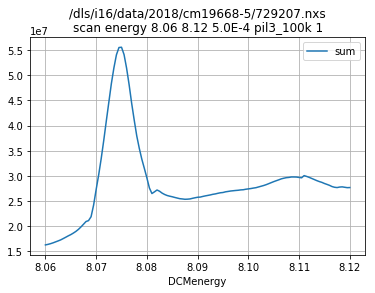

In [6]:
#Ho L3 fluo - 2 eV step vert flou
n=pdnx(p % 729207)
n.plt('DCMenergy','sum')

<IPython.core.display.Javascript object>


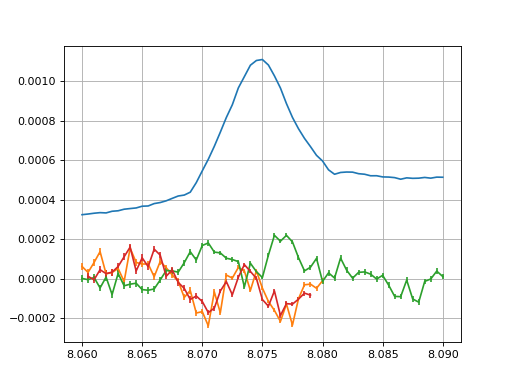

=== fixed one:  729351 10
198
=== fixed one:  729355 146
198
=== fixed one:  729360 78
198
=== fixed one:  729362 146
198
=== fixed one:  729365 10
198
=== fixed one:  729372 12
198
=== fixed one:  729376 148
198
=== fixed one:  729386 8
198
=== fixed one:  729390 146
198
=== fixed one:  729393 10
198
=== fixed one:  729395 78
198
=== fixed one:  729404 146
198
=== fixed one:  729407 10
198
=== fixed one:  729409 80
198
=== fixed one:  729285 60
198
=== fixed one:  729301 132
198
=== fixed one:  729306 68
198
=== fixed one:  729315 134
198
=== fixed one:  729322 138
198
=== fixed one:  729351 10
198
=== fixed one:  729355 146
198
=== fixed one:  729360 78
198
=== fixed one:  729362 146
198
=== fixed one:  729365 10
198
=== fixed one:  729372 12
198
=== fixed one:  729376 148
198
=== fixed one:  729386 8
198
=== fixed one:  729390 146
198
=== fixed one:  729393 10
198
=== fixed one:  729395 78
198
=== fixed one:  729404 146
198
=== fixed one:  729407 10
198
=== fixed one:  729409 80
198

In [13]:
def escans(scans, which, scalefac=1):
    en=[]; fracdiff=[]; tot=[]; diff=[]
    for i in scans:
        d(i)
        
        #delete data points arount ring current jump (assume just one jump)
        jump = np.roll(d.rc,-1) > d.rc
        #idx = list(jump).index(True)  
        idx = list(jump).index(True)+1   #rc seems to be one point ahead of detector
        #if idx % 2 == 0:
        if idx % 2 == 0 and idx !=len(d.sum): #ignore last
            d.sum = np.delete(d.sum,[idx,idx+1])
            d.x24_anout = np.delete(d.x24_anout,[idx,idx+1])                      
            print '=== fixed one: ', i, idx
            #figure(); plot(d.sum)
            print len(d.sum)    
            
        en+=[d.energy2[0]]
        neg_sum=sum(d.sum[d.x24_anout<0])
        pos_sum=sum(d.sum[d.x24_anout>0])
        tot+=[neg_sum+pos_sum]
        diff+=[neg_sum-pos_sum]

    tot=np.array(tot)    
    diff=np.array(diff)
    err=np.sqrt(tot)
    fracdiff=diff*1.0/tot
    err_fracdiff=1./err
    if which=='fracdiff':
        errorbar(en, fracdiff, err_fracdiff); grid(1)
    elif which=='tot':
        plot(en, tot*scalefac); grid(1)
        
runs0=range(729242, 729242+31+1)
runs1=range(729283, 729324)
runs2=range(729351, 729412)
runs3=range(729413, 729450+1)

figure()

#escans(runs0, 'fracdiff') #big glitch
escans(runs2, 'tot', scalefac=1e-13)
escans(runs1, 'fracdiff')
escans(runs2, 'fracdiff')
escans(runs3, 'fracdiff')

    

=== fixed one:  729327 100
198
=== fixed one:  729329 172
198
=== fixed one:  729334 116
198
=== fixed one:  729339 62
198
=== fixed one:  729346 72
198


<IPython.core.display.Javascript object>


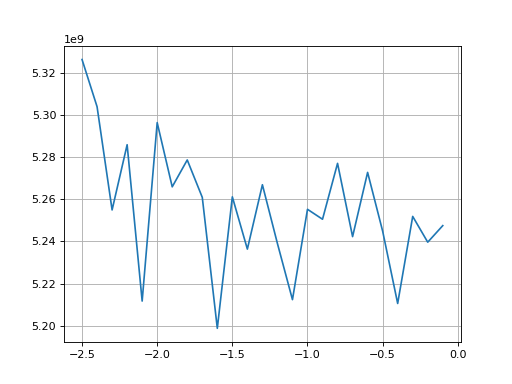

<IPython.core.display.Javascript object>


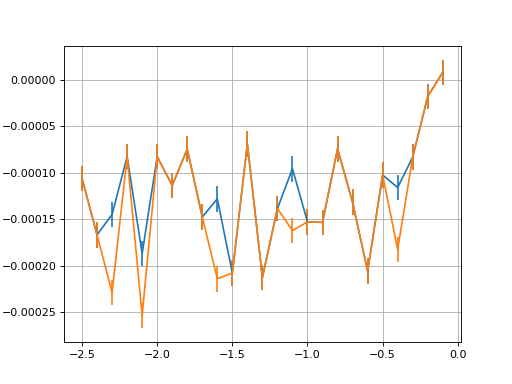

In [165]:
#### measurements vs magnet current

runs=range(729325, 729349+1)

mag=[]; fracdiff=[]; tot=[]; diff=[]; norm_tot=[]; norm_diff=[]
for i in runs:
    d(i)
    #print i, d.cmd
    
    
    #delete data points arount ring current jump (assume just one jump)
    jump = np.roll(d.rc,-1) > d.rc
    #idx = list(jump).index(True)  
    idx = list(jump).index(True)+1   #rc seems to be one point ahead of detector
    #if idx % 2 == 0:
    if idx % 2 == 0 and idx !=len(d.sum): #ignore last
       d.sum = np.delete(d.sum,[idx,idx+1])
       d.x24_anout = np.delete(d.x24_anout,[idx,idx+1])                      
       print '=== fixed one: ', i, idx
       #figure(); plot(d.sum)
       print len(d.sum)  
    
    
    #delete data points arount ring current jump (assume just one jump)
    #jump = np.roll(d.rc,-1) > d.rc
    #idx = list(jump).index(True)   
    #if idx % 2 == 0:
    #   d.sum = np.delete(d.sum,[idx,idx+1])
    #   d.x24_anout = np.delete(d.x24_anout,[idx,idx+1])                      
    #   print '=== fixed one: ', i, idx
    #   #figure(); plot(d.sum)
    #   print len(d.sum) 
    

    mag+=[d.x24_anout[0]]
    neg_sum=sum(d.sum[d.x24_anout<0])
    pos_sum=sum(d.sum[d.x24_anout>0])
    tot+=[neg_sum+pos_sum]
    diff+=[neg_sum-pos_sum]

    #neg_rc=sum(d.rc[d.x24_anout<0])
    #pos_rc=sum(d.rc[d.x24_anout>0])
    
    #norm_tot+=[neg_sum*1./neg_rc + pos_sum*1./pos_rc]
    #norm_diff+=[neg_sum*1./neg_rc - pos_sum*1./pos_rc]
    
    #figure(); plot(d.rc/max(d.rc)); plot(d.sum*1./max(d.sum))
 
    
tot=np.array(tot)    
diff=np.array(diff)
#norm_tot=np.array(norm_tot)
#norm_diff=np.array(norm_diff)

err=np.sqrt(tot)
fracdiff=diff*1.0/tot
err_fracdiff=1./err
figure(); plot(mag, tot); grid(1)
figure(); errorbar(mag, fracdiff, err_fracdiff); grid(1)

errorbar(mag, fracdiff1, err_fracdiff); grid(1)
#fracdiff1=fracdiff
#figure(); errorbar((np.array(runs)-729300), fracdiff, err_fracdiff); grid(1)
#figure(); plot(mag, (neg_sum*1./neg_rc - pos_sum*1./pos_rc)/(neg_sum*1./neg_rc + pos_sum*1./pos_rc)); grid(1)
#figure(); plot(mag, (neg_sum*1./neg_rc - pos_sum*1./pos_rc)); grid(1)
#figure(); plot(mag, (norm_diff/norm_tot)); grid(1)

# Summary

Remove glitches & process last files - didn't help a lot. rc and sum are out by by one point but doesn't help much anyway. Maybe normalize to ic1 next time?

Fix nexus reader for multi dimensional scans - done

Why is xmcd signal so strong in Shimomi et al? - ?????

Need to cool sample (gas jet cooler?)
